In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
LOCAL_FAST_AI = '/Users/krishnakalyan3/Educational/FastAI/fastai/'
AWS_FAST_AI = '/home/ubuntu/fastai'
sys.path.append(AWS_FAST_AI)

In [3]:
from fastai.transforms import * 
from fastai.conv_learner import * 
from fastai.model import *
from fastai.dataset import * 
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = '/home/ubuntu/Plant/data/'

In [6]:
def get_data(size, bs=64):
    aug_tfms=transforms_top_down
    #aug_tfms=transforms_side_on
    tfms = tfms_from_model(arch, sz=size, aug_tfms=aug_tfms)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs)
    return data

In [8]:
sz=224
bs=64
arch = resnet34
data = get_data(sz)

In [10]:
learn = ConvLearner.pretrained(arch, data) 
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 93%|█████████▎| 56/60 [00:23<00:01,  2.39it/s, loss=11.9]

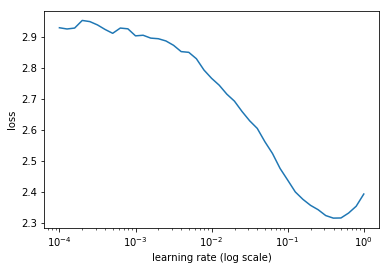

In [11]:
learn.sched.plot()

In [ ]:
lr = 0.2
learn.precompute=False
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))


  0%|          | 0/60 [00:00<?, ?it/s]


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError:

[ 0.       1.66353  0.80717  0.72813]                     
[ 1.       1.34561  0.73798  0.74479]                     
 72%|███████▏  | 43/60 [00:17<00:07,  2.41it/s, loss=1.04]

In [ ]:
learn.unfreeze()
lr=np.array([lr/9,lr/3,lr])
learn.fit(lr, 3, cycle_len=1, cycle_mult=4)

In [ ]:
learn.save(f'resnext_32_{sz}')
learn.sched.plot_loss()

In [ ]:
learn.sched.plot_lr()

In [ ]:
learn.save('resnxt_basic')

In [ ]:
learn.sched.plot_loss()